In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import adam 
from keras.optimizers import SGD
from keras.optimizers import RMSprop

In [0]:
df = pd.read_csv('fashion-mnist_train.csv')
df2 = pd.read_csv('Q2_Clothing_test.csv')

In [61]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [62]:
df2.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,105,96,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,15,172,92,0,0,0,0,0,125,165,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,244,247,241,...,255,255,235,201,82,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,61,2,0,14,67,54,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,4,129,95,125,139,47,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,143,...,62,79,156,165,12,0,2,0,0,0,0,0,0,0,0,0,1,1,0,2,82,78,83,87,83,82,79,79,79,93,155,163,19,0,2,0,0,0,0,0


In [63]:
# Target Variable
Y = df['label']
y = Y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>


In [0]:
# Features
X = df.iloc[:,1:]
x = X.to_numpy(dtype=np.float32)

In [0]:
XTest = df2.to_numpy(dtype=np.float32)

In [66]:
print(y.shape)
print(x.shape)

(60000,)
(60000, 784)


In [0]:
# Data Visualization
np.random.seed = 0

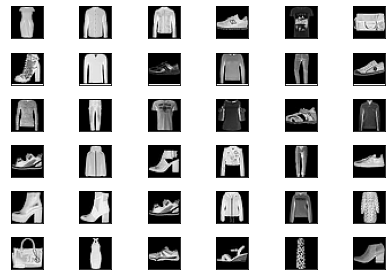

In [68]:
for i in range(36):
  n = np.random.randint(1,1000)
  plt.subplot(6,6,i+1,xticks=[],yticks=[])
  plt.tight_layout()
  plt.imshow(x[n].reshape((28,28)),cmap='gray')

In [0]:
algo = TSNE(n_components=2)
z = algo.fit_transform(x[:5000])

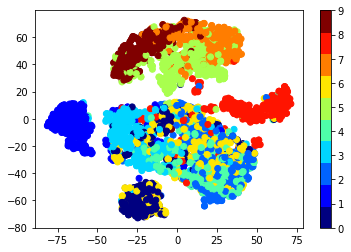

In [70]:
plt.scatter(z[:,0],z[:,1],c=y[:5000],cmap = plt.cm.get_cmap('jet',10))
plt.colorbar(ticks = range(10))

In [0]:
# Normalize the data
x1 = x/255
Xtest = XTest/255

# onehot encoding
y1 = to_categorical(y)

In [72]:
model = Sequential([
                      Dense(128,activation='sigmoid',input_shape=(784,)),
                      Dense(10,activation='softmax')
])
# Optimizer
opt = RMSprop(learning_rate=0.001)
# Compiling model
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'] )

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
Xtrain,Xval,Ytrain,Yval = train_test_split(x1,y1,test_size=0.15,random_state=0)

In [74]:
model.fit(Xtrain,Ytrain,verbose=1,epochs=15,validation_data=(Xval,Yval))

Train on 51000 samples, validate on 9000 samples
Epoch 1/15
51000/51000 [==============================] - 6s 116us/step - loss: 0.5490 - accuracy: 0.8100 - val_loss: 0.4527 - val_accuracy: 0.8337
Epoch 2/15
51000/51000 [==============================] - 4s 75us/step - loss: 0.4073 - accuracy: 0.8524 - val_loss: 0.3829 - val_accuracy: 0.8660
Epoch 3/15
51000/51000 [==============================] - 4s 79us/step - loss: 0.3718 - accuracy: 0.8656 - val_loss: 0.3516 - val_accuracy: 0.8771
Epoch 4/15
51000/51000 [==============================] - 4s 82us/step - loss: 0.3492 - accuracy: 0.8731 - val_loss: 0.3604 - val_accuracy: 0.8692
Epoch 5/15
51000/51000 [==============================] - 4s 81us/step - loss: 0.3308 - accuracy: 0.8793 - val_loss: 0.3446 - val_accuracy: 0.8776
Epoch 6/15
51000/51000 [==============================] - 4s 74us/step - loss: 0.3171 - accuracy: 0.8853 - val_loss: 0.3537 - val_accuracy: 0.8770
Epoch 7/15
51000/51000 [==============================] - 4s 77us/st

In [0]:
# SGD
# RmSPRop
# Diff Learning Rates:0.001
# Diff number of neurons:128
# one more hidden layer
#activation : sigmoid,relu

In [0]:
Ytest = model.predict(Xtest)

In [83]:
Ytest.shape

(1000, 10)

In [0]:
labels = []
for i in range(Ytest.shape[0]):
  indx = np.argmax(Ytest[i])
  labels.append(indx)

In [85]:
labels[:5]

[9, 5, 3, 7, 0]

In [0]:
with open("Q2.txt", "w") as op:
    for item in labels:
      op.write(str(item)+'\n')